### Violin Plots and its variations.

Author- Shefali C.

Help: [Python Graph Gallery](https://python-graph-gallery.com/violin-plot/)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#checking seaborn version
sns.__version__

'0.12.2'

In [4]:
#Available built-in datasets
print(*sns.get_dataset_names(), sep = ", ")

anagrams, anscombe, attention, brain_networks, car_crashes, diamonds, dots, dowjones, exercise, flights, fmri, geyser, glue, healthexp, iris, mpg, penguins, planets, seaice, taxis, tips, titanic


In [5]:
#loading tips dataset
#dataframe returned is a pandas dataframe
df = sns.load_dataset('tips')

In [6]:
df.columns.values.tolist()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

Explaination of all variables:  
1. `total_bill`- Total bill for each customer/customer group in dollars.  
2. `tip`- Tip received by the waiter in dollars.  
3. `sex`- Gender of the person paying the bill.  
4. `smoker`- Whether there were smokers in the group (or individual).  
5. `day`- Day of the week- Thursday, Friday, Saturday, Sunday.  
6. `time`- Time of the day- Lunch or Dinner.  
7. `size`- Size of the party.  


In [31]:
#Some rows of the dataset
print("First three rows in the dataframe:\n", df.head(3))
print("\nLast three rows in the dataframe:\n", df.tail(3))

First three rows in the dataframe:
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

Last three rows in the dataframe:
      total_bill   tip     sex smoker   day    time  size
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2


In [7]:
#set grey background for the plot
sns.set_style('darkgrid')

### PLOT 1: Comparing 1 numerical variable and 1 categorical variable. 

One column is quantitative whose values form the basis of comparison. The other column (x) contains categories/groups amongst which comparison is to be done.  


Text(0.5, 1.0, 'Variation in tips given on Thur-Sun')

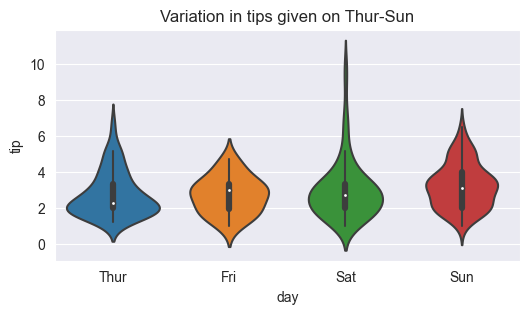

In [21]:
#set size of figure
plt.figure(figsize = (6,3))
#violin plot
sns.violinplot(y = df['tip'], x = df['day'])
#set title
plt.title('Variation in tips given on Thur-Sun')

Things to note from plot above:  
1. On all 4 days, majority of tips given are centered around the median for that day.  
2. Saturday records highest range of tips.  
3. Median tip on Thursday is lowest as compared to other days.

### PLOT 2: Horizontal violin plot

Additions to this plot:  
1. values to x and y arguments have been swapped to create horizontal plot.  
2. `linwidth` parameters increases width of the borders.  
3. `width` controls the overall width of each violin plot.
4. `palette` is used to control how each group gets coloured.  

Below, I have created a custom palette dictionary `my_pal`, which gives my colour of choice to each day.  
Instead of creating own palette, standard palette names can also be used.  


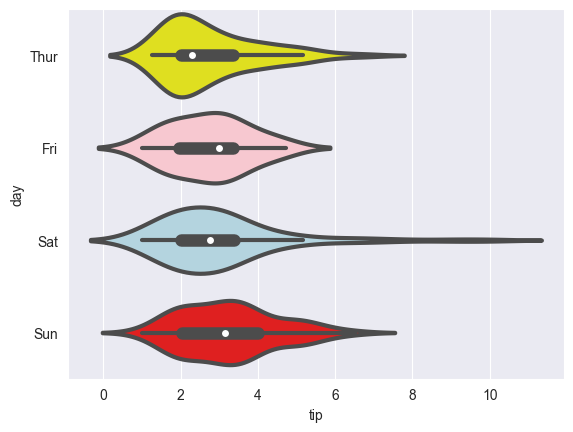

In [48]:
#custom palette
my_pal = {"Thur": "yellow", "Fri": "pink", "Sat":"lightblue", "Sun":"red"}
#flip x and y arguments in the function
sns.violinplot(x = df['tip'], y = df['day'], linewidth = 3, width = 0.9, palette = my_pal)

#display plot
plt.show()

#### Highlighting only 1 group using a colour

In [56]:
#this palette gives a specific color to my group of choice and uses 1 color for rest
my_pal2 = {day : "red" if day == "Sat" else "yellow" for day in df['day'].unique()}
my_pal2

{'Sun': 'yellow', 'Sat': 'red', 'Thur': 'yellow', 'Fri': 'yellow'}

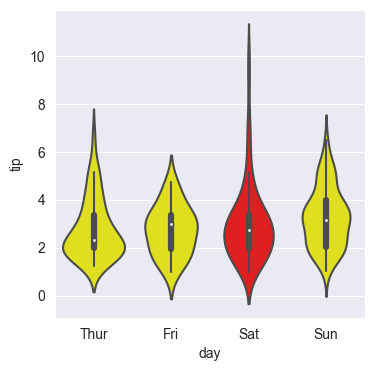

In [57]:
plt.figure(figsize = (4,4))
sns.violinplot(x = df['day'], y = df['tip'], palette = my_pal2)
plt.show()

### PLOT 3: Comparing 2 quantitative variables

<AxesSubplot: >

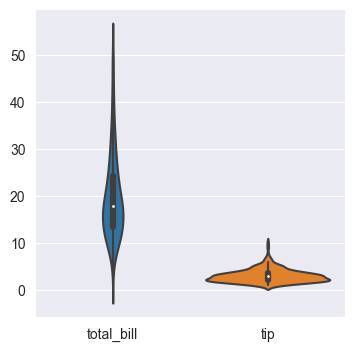

In [28]:
#figure size
plt.figure(figsize = (4,4))

sns.violinplot(data = df.loc[:,('total_bill', 'tip')])

### PLOT 4: Do men tip more than women?

In [36]:
#checking number of men and women bill payers in the dataset
df.groupby(['sex'])['sex'].count()

sex
Male      157
Female     87
Name: sex, dtype: int64

Out of 244 samples, 157 customers who paid bill were men and 87 were women.

<AxesSubplot: xlabel='sex', ylabel='tip'>

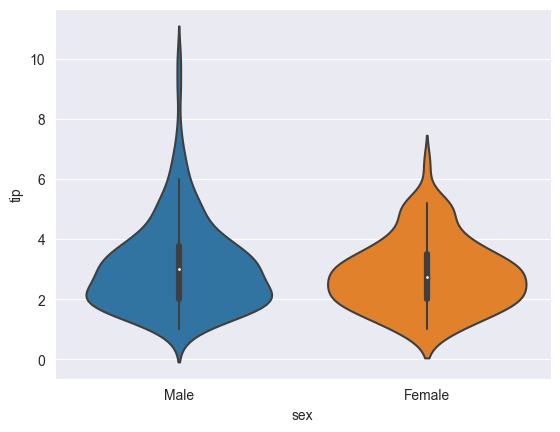

In [32]:
sns.violinplot(x = df['sex'], y = df['tip'])

While the median tip given by both men and women is roughly similar, range of tip offered by men is higher. 

### PLOT 5: Setting order in which groups appear

#### 5a. Manually set the order

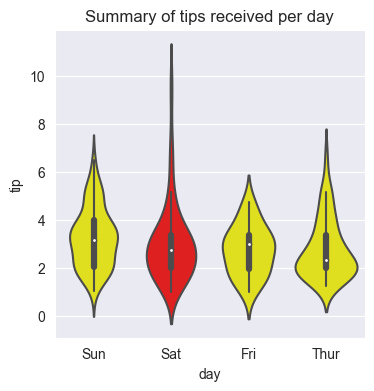

In [12]:
plt.figure(figsize = (4,4))

my_pal = {day: "red" if day == 'Sat' else "yellow" for day in df['day'].unique()}
plt.title('Summary of tips received per day')
sns.violinplot(x = df['day'], y = df['tip'], order = ['Sun', 'Sat', 'Fri', 'Thur'], palette = my_pal)
plt.show()

#### 5b. Order by an aggregate value like mean/median etc.

In [33]:
#ordering the days of week by decreaing median
my_order = df.groupby(by = ['day'])['tip'].median().reset_index().sort_values('tip', ascending = False)
my_order

,day,tip
3,Sun,3.150
1,Fri,3.000
2,Sat,2.750
0,Thur,2.305


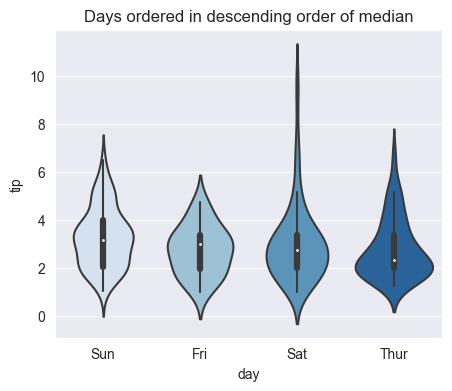

In [37]:
plt.figure(figsize = (5,4))
#title of plot
plt.title('Days ordered in descending order of median')
sns.violinplot(x = df['day'], y = df['tip'], order = my_order['day'], palette = 'Blues')
plt.show()

### PLOT 6. Using sub-groups

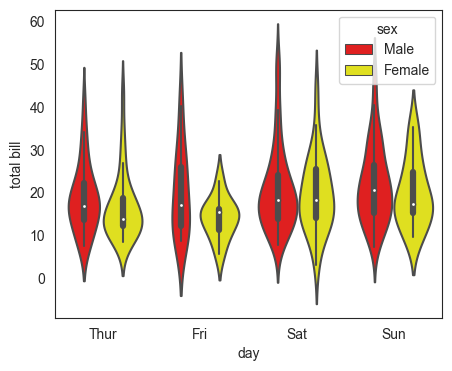

In [45]:
my_pal = {'Male' : 'red', 'Female': 'yellow'}
#set the plot background style
sns.set_style('white')
plt.figure(figsize = (5,4))
sns.violinplot(x = df['day'], y = df['total_bill'], hue = df['sex'], palette = my_pal)
plt.ylabel('total bill')
plt.show()

### PLOT 7: Adding text labels to violinplots

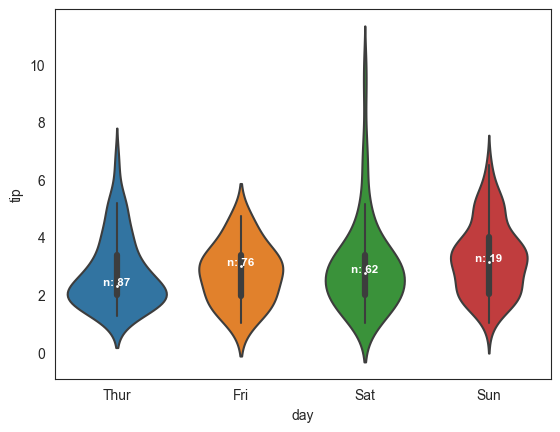

In [71]:

# Basic violinplot stored in a matplotlib.axes object
ax = sns.violinplot(x="day", y="tip", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['day'])['tip'].median().values
nobs = df['day'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='w',
            weight='semibold')
plt.show()